## Exploratory Data Analysis

### Import Libraries

In [1]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# Set Plot Style
sns.set(color_codes=True)

# display all columns
pd.set_option('max_columns', None, 'display.float_format', lambda x: '%.2f' % x)

### Read Data

In [3]:
# Mounting to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read Data

client_df = pd.read_csv('/content/drive/MyDrive/BCG - Data Science & Analytics Virtual Experience Program/Modul 2 - Exploratory Data Analysis/client_data.csv')
price_df = pd.read_csv('/content/drive/MyDrive/BCG - Data Science & Analytics Virtual Experience Program/Modul 2 - Exploratory Data Analysis/price_data.csv')

In [5]:
client_df.sample(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
9304,84a370456b381ed46cceb39dfabc1f11,lmkebamcaaclubfxadlmueccxoimlema,5098,0,1975,2009-09-01,2016-09-01,2009-09-01,2015-09-02,486.15,1975,0.00,16.35,0.17,0.09,44.31,f,189.34,10.08,10.08,1,42.21,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.39,0
12742,26ddc0a27d48169919f6a2734c309c70,MISSING,72253,29946,3970,2009-06-05,2016-06-05,2009-06-05,2015-06-08,3540.28,0,0.00,13.60,0.14,0.00,44.31,t,0.00,19.28,19.28,2,336.15,7,ldkssxwpmemidmecebumciepifcamkci,13.20,1
2441,7bd42e43033af49166e1b84a510c3770,MISSING,34632,0,0,2007-09-06,2016-09-06,2007-09-06,2015-09-07,5111.04,0,0.00,109.89,0.14,0.00,44.31,f,0.00,11.95,11.95,1,684.67,8,ldkssxwpmemidmecebumciepifcamkci,13.86,0
1645,b351412508bbbcb9453bf0923b866822,MISSING,1722179,1192414,181187,2010-01-11,2017-01-04,2010-01-11,2016-01-05,1032.17,1172,0.00,16.15,0.16,0.08,44.31,t,127.32,28.56,28.56,2,102.32,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,11.40,0
11925,d59728ebd8aa24240cd3055a90b0724a,MISSING,442891,0,32485,2006-02-11,2016-02-11,2006-02-11,2015-02-12,8117.26,7857,0.00,131.76,0.10,0.09,59.00,f,643.82,0.12,0.12,1,574.71,10,ldkssxwpmemidmecebumciepifcamkci,52.00,0


*Key Takeaways :*

*   In the client data, we have a mix of numeric and categorical data, which we will need to transform before modelling later.

In [6]:
price_df.sample(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
96951,7e4051885cba488131424c0148bbcfba,2015-08-01,0.17,0.09,0.00,44.44,0.00,0.00
39455,5159aea36dad292a6dd09569d042a886,2015-12-01,0.15,0.00,0.00,45.94,0.00,0.00
177042,7ff68cfec6cdadd370b9fb5bbbea27d0,2015-09-01,0.12,0.11,0.08,40.73,24.44,16.29
989,005a1ca83d28ef9fe6b50db90fab2e6a,2015-07-01,0.17,0.09,0.00,44.44,0.00,0.00
70610,6b5ad01a9a639f635c55739c54491373,2015-03-01,0.15,0.00,0.00,44.27,0.00,0.00


*Key Takeaways :*

*   In the price data, it is purely numeric data but we can see a lot of zeros.

In [7]:
# Check Client Data Number of Rows & Features

print('Total Client Data Rows :', client_df.shape[0])
print('Total Client Data Features :', client_df.shape[1])

Total Client Data Rows : 14606
Total Client Data Features : 26


In [8]:
# Check Price Data Number of Rows & Features

print('Total Price Data Rows :', price_df.shape[0])
print('Total Price Data Features :', price_df.shape[1])

Total Price Data Rows : 193002
Total Price Data Features : 8


### Exploratory Data Analysis

In [9]:
# Create Client Data Info

list_item = []
for col in client_df.columns:
    list_item.append([col, client_df[col].dtype, client_df[col].isna().sum(), 100*client_df[col].isna().sum()/len(client_df[col]), client_df[col].nunique(), client_df[col].unique()[:4]])
desc_client_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null Num, Null %,Unique Num,Unique Sample'.split(sep = ","))
desc_client_df

,Feature,Data Type,Null Num,Null %,Unique Num,Unique Sample
0,id,object,0,0.00,14606,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc..."
1,channel_sales,object,0,0.00,8,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm..."
2,cons_12m,int64,0,0.00,11065,"[0, 4660, 544, 1584]"
3,cons_gas_12m,int64,0,0.00,2112,"[54946, 0, 1542867, 80583]"
4,cons_last_month,int64,0,0.00,4751,"[0, 526, 1998, 1260]"
5,date_activ,object,0,0.00,1796,"[2013-06-15, 2009-08-21, 2010-04-16, 2010-03-30]"
6,date_end,object,0,0.00,368,"[2016-06-15, 2016-08-30, 2016-04-16, 2016-03-30]"
7,date_modif_prod,object,0,0.00,2129,"[2015-11-01, 2009-08-21, 2010-04-16, 2010-03-30]"
8,date_renewal,object,0,0.00,386,"[2015-06-23, 2015-08-31, 2015-04-17, 2015-03-31]"
9,forecast_cons_12m,float64,0,0.00,13993,"[0.0, 189.95, 47.96, 240.04]"


In [10]:
# Check Duplicate Data

print('Client Duplicate Values =', client_df.duplicated().sum())

Client Duplicate Values = 0


*Key Takeaways*

*   There are missing values in `channel sales` feature labeled `MISSING` value.
*   Need to convert date features (`date_activ`, `date_end`, `date_modif_prod`, `date_renewal`) from object into datetime data type.
*   There are no duplicate values.

In [11]:
# Create Price Data Info

list_item = []
for col in price_df.columns:
    list_item.append([col, price_df[col].dtype, price_df[col].isna().sum(), 100*price_df[col].isna().sum()/len(price_df[col]), price_df[col].nunique(), price_df[col].unique()[:4]])
desc_price_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null Num, Null %,Unique Num,Unique Sample'.split(sep = ","))
desc_price_df

,Feature,Data Type,Null Num,Null %,Unique Num,Unique Sample
0,id,object,0,0.00,16096,"[038af19179925da21a25619c5a24b745, 31f2ce54992..."
1,price_date,object,0,0.00,12,"[2015-01-01, 2015-02-01, 2015-03-01, 2015-04-01]"
2,price_off_peak_var,float64,0,0.00,1853,"[0.151367, 0.149626, 0.150321, 0.145859]"
3,price_peak_var,float64,0,0.00,1189,"[0.0, 0.103395, 0.102234, 0.10524]"
4,price_mid_peak_var,float64,0,0.00,711,"[0.0, 0.071536, 0.070375, 0.07515]"
5,price_off_peak_fix,float64,0,0.00,66,"[44.26693116, 44.26692996, 44.44470996, 40.565..."
6,price_peak_fix,float64,0,0.00,31,"[0.0, 24.33958068, 24.43733004, 24.33957804]"
7,price_mid_peak_fix,float64,0,0.00,28,"[0.0, 16.22638872, 16.29155496, 16.22638296]"


In [12]:
# Check Duplicate Data

print('Price Duplicate Values =', price_df.duplicated().sum())

Price Duplicate Values = 0


*Key Takeaways*

*   There are no missing value for each features.
*   There are no duplicate values.

In [13]:
# Convert Date Data Type

dt = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for i in dt:
  client_df[i] = pd.to_datetime(client_df[i])

In [14]:
# Checking Data Type After Convert

client_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [15]:
# Grouping Features Based on Their Data Type

client_num = client_df.select_dtypes(include=[np.number]).columns
client_cat = client_df.select_dtypes(exclude=[np.number] + [np.datetime64]).columns[1:]

price_num = price_df.select_dtypes(include=[np.number]).columns
price_cat = price_df.select_dtypes(exclude=[np.number]).columns

#### Descriptive Statistics

In [16]:
# Check Client Data Statistic Value

client_df.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
cons_12m,14606.00,159220.29,573465.26,0.00,1512.25,5674.75,14115.50,40763.75,913771.75,6207104.00
cons_gas_12m,14606.00,28092.38,162973.06,0.00,0.00,0.00,0.00,0.00,75854.00,4154590.00
cons_last_month,14606.00,16090.27,64364.20,0.00,0.00,0.00,792.50,3383.00,82161.50,771203.00
forecast_cons_12m,14606.00,1868.61,2387.57,0.00,84.92,495.00,1112.88,2401.79,6127.10,82902.83
forecast_cons_year,14606.00,1399.76,3247.79,0.00,0.00,0.00,314.00,1745.75,5968.75,175375.00
forecast_discount_energy,14606.00,0.97,5.11,0.00,0.00,0.00,0.00,0.00,0.00,30.00
forecast_meter_rent_12m,14606.00,63.09,66.17,0.00,0.33,16.18,18.80,131.03,145.72,599.31
forecast_price_energy_off_peak,14606.00,0.14,0.02,0.00,0.11,0.12,0.14,0.15,0.17,0.27
forecast_price_energy_peak,14606.00,0.05,0.05,0.00,0.00,0.00,0.08,0.10,0.10,0.20
forecast_price_pow_off_peak,14606.00,43.13,4.49,0.00,40.61,40.61,44.31,44.31,46.31,59.27


*Key Takeaways*

*   There are no invalid entries for each features.
*   `Consumptions` and `Forecast` features seem to highly positively skew distribution. We will handle it later on `data preprocessing` stage.

In [17]:
# Check Price Data Statistic Value

price_df.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
price_off_peak_var,193002.00,0.14,0.03,0.00,0.11,0.13,0.15,0.15,0.17,0.28
price_peak_var,193002.00,0.05,0.05,0.00,0.00,0.00,0.09,0.10,0.11,0.23
price_mid_peak_var,193002.00,0.03,0.04,0.00,0.00,0.00,0.00,0.07,0.08,0.11
price_off_peak_fix,193002.00,43.33,5.41,0.00,40.57,40.73,44.27,44.44,46.44,59.44
price_peak_fix,193002.00,10.62,12.84,0.00,0.00,0.00,0.00,24.34,24.84,36.49
price_mid_peak_fix,193002.00,6.41,7.77,0.00,0.00,0.00,0.00,16.23,16.29,17.46


*Key Takeaways*

*   There are no invalid entries for each features.
*   `price_peak_fix` and `price_mid_peak_fix` features seem to highly negatively skew distribution. We will handle it later on `data preprocessing` stage.

#### Data Visualization

In [18]:
# Create Stacked Bar Chart Function

def plot_stacked_bar_chart(df, title, figsize):
  # create chart
  df.plot(kind='barh', stacked=True, color = ['#31688e', '#21918c'], width = 0.6, figsize = figsize)
  plt.title(title, fontsize=14)
  plt.xlabel("Customers Churn Rate (%)")
  plt.legend(["Retention", "Churn"], loc='lower right')

  # create annotation
  y_numbers = range(df.shape[0])
  for i in y_numbers:
    if df[0][i] == 0:
      continue
    else:
      plt.text(y = y_numbers[i], x = (df[0][i]/2),
              s = (str(round((df[0][i]*100),2))) + '%',
              size = 12, ha='center', va='center', color = 'white')
    if df[1][i] == 0:
      continue
    else:
      plt.text(y = y_numbers[i], x = 1-(df[1][i]/2),
              s = (str(round((df[1][i]*100),2))) + '%',
              size = 12, ha='center', va='center', color = 'white')

  plt.tight_layout()

##### Churn Analysis

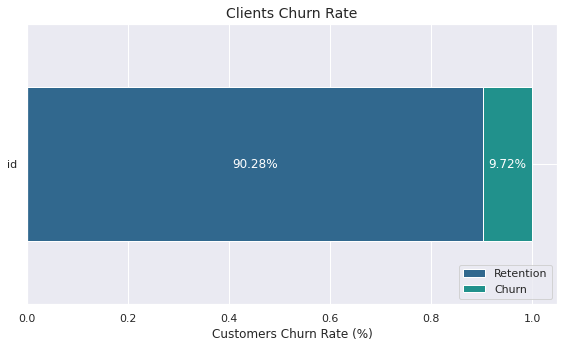

In [19]:
# Create Churn Rate Chart

churn_rate = client_df.groupby('churn').agg({'id' : 'count'}).T
churn_rate = churn_rate.div(churn_rate.sum(axis=1), axis=0).sort_values(by = 1)
plot_stacked_bar_chart(churn_rate, 'Clients Churn Rate', (8,5))

*Key Takeaway*

Almost `10%` customers have churned.

##### Channel Sales Analysis

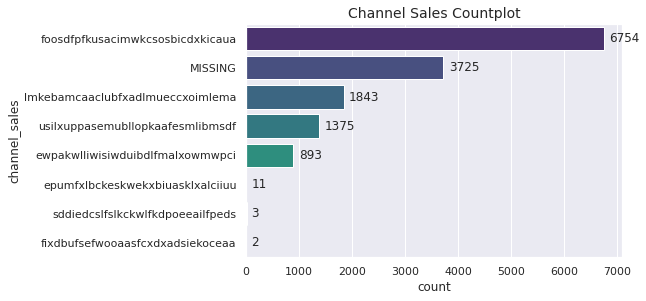

In [20]:
# Create Countplot by Channel Sales Chart

sns.countplot(y=client_df['channel_sales'], palette='viridis')
plt.title('Channel Sales Countplot', fontsize=14)
y_numbers = range(8)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = client_df['channel_sales'].value_counts()[i]+(100), s = str(round(client_df['channel_sales'].value_counts()[i], 2)), size = 12, ha = 'left', va='center')

*Key Takeaway*

We have 8 categories with 1 `MISSING` category. However, we can see that in the last 3 categories in the output above, those features only have 11, 3, and 2 data. Considering that our dataset has about 14000 rows, this means that those values will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

We will handle it later on `data preprocessing` stage.

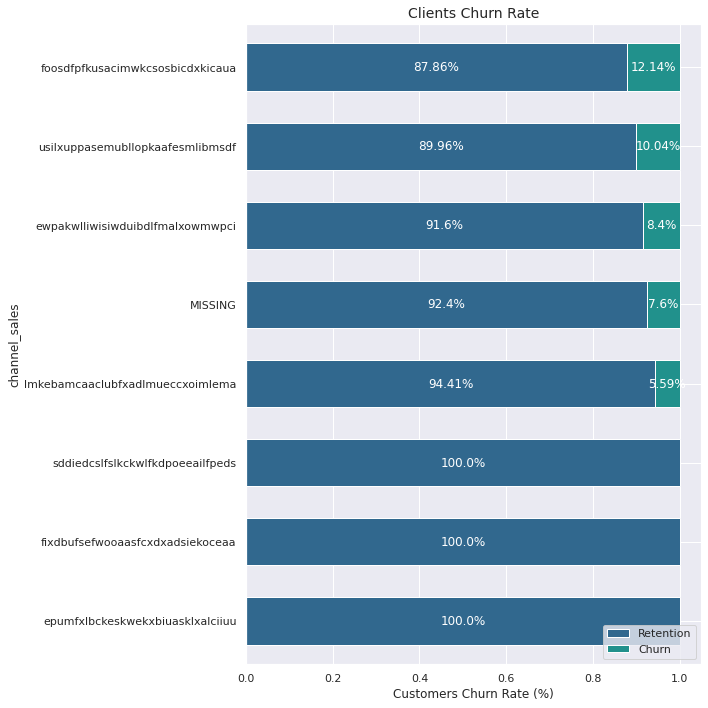

In [21]:
# Create Churn Rate by Channel Sales Chart

cs_c = pd.crosstab(index = client_df['channel_sales'], columns = client_df['churn'])
cs_c = cs_c.div(cs_c.sum(axis=1), axis=0).sort_values(by = 1)
plot_stacked_bar_chart(cs_c, 'Clients Churn Rate', (10,10))

*Key Takeaways*

*   Customers churn is distributed among 5 different `channel_sales` values. As well as, the `channel_sales` labeled `MISSING` has a 7.6% churn rate. `MISSING` indicates a missing value that was added by the team when they were cleaning the dataset. This feature could be an essential feature when it comes to building our model, so they didn't drop those data.
*   Interestingly, 3 values of `channel_sales` have a 0% churn rate. It is perhaps because we only have a litle data from those values.

##### Contract Type Analysis

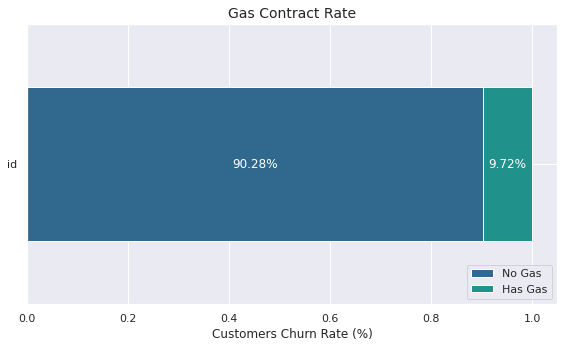

In [22]:
# Create Gas Contract Rate Chart

has_gas = client_df.groupby('has_gas').agg({'id' : 'count'}).T
has_gas = churn_rate.div(churn_rate.sum(axis=1), axis=0).sort_values(by = 1)
plot_stacked_bar_chart(churn_rate, 'Gas Contract Rate', (8,5))
plt.legend(["No Gas", "Has Gas"], loc='lower right')

*Key Takeaway*

Almost 10% customers have gas contract.

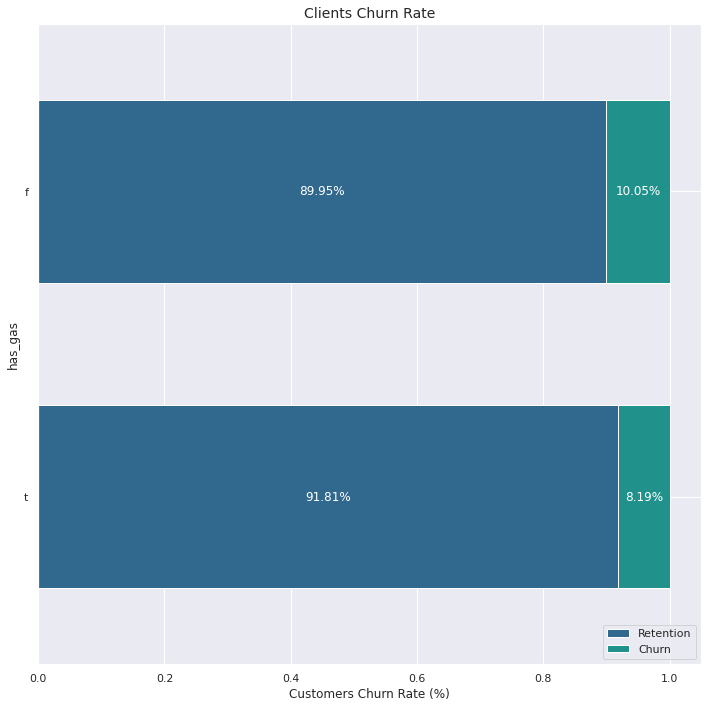

In [23]:
# Create Churn Rate by Contract Type Chart

hg_c = pd.crosstab(index = client_df['has_gas'], columns = client_df['churn'])
hg_c = hg_c.div(hg_c.sum(axis=1), axis=0).sort_values(by = 1)
plot_stacked_bar_chart(hg_c, 'Clients Churn Rate', (10,10))

*Key Takeaway*

We can see clearly that `contract type` don't have significant different `churn rate`. So, it seems `contract type` have a low correlation to `churn rate`.

##### Origin Up

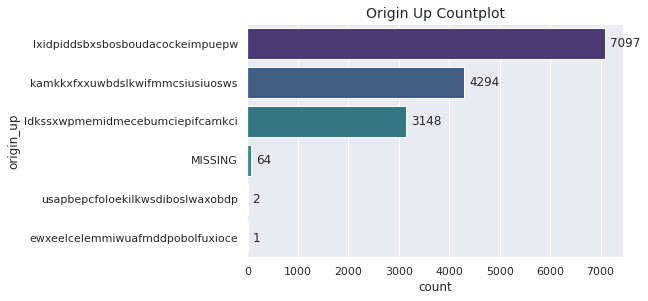

In [24]:
# Create Countplot by Origin Up Chart

sns.countplot(y=client_df['origin_up'], palette='viridis')
plt.title('Origin Up Countplot', fontsize=14)
y_numbers = range(6)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = client_df['origin_up'].value_counts()[i]+(100), s = str(round(client_df['origin_up'].value_counts()[i], 2)), size = 12, ha = 'left', va='center')

*Key Takeaway*

Similar with `Channel Sales` Feature, the last 3 categories in the output above are almost entirely a constant value and will provide very little predictive power. We will handle it later on `data preprocessing` stage.

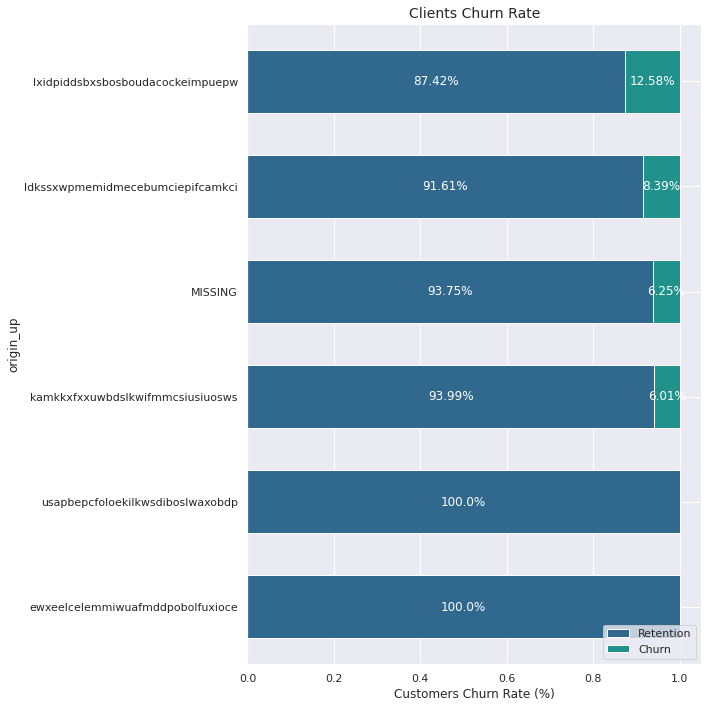

In [25]:
# Create Churn Rate by Origin Up Chart

cs_c = pd.crosstab(index = client_df['origin_up'], columns = client_df['churn'])
cs_c = cs_c.div(cs_c.sum(axis=1), axis=0).sort_values(by = 1)
plot_stacked_bar_chart(cs_c, 'Clients Churn Rate', (10,10))

*Key Takeaways*

*   Customers churn is distributed among 4 different `origin_up` values.
*   Similar with `channel_sales`, interestingly 2 values of `origin_up` have a 0% churn rate. It is perhaps because we only have a litle data from those values.

##### Consumption Analysis

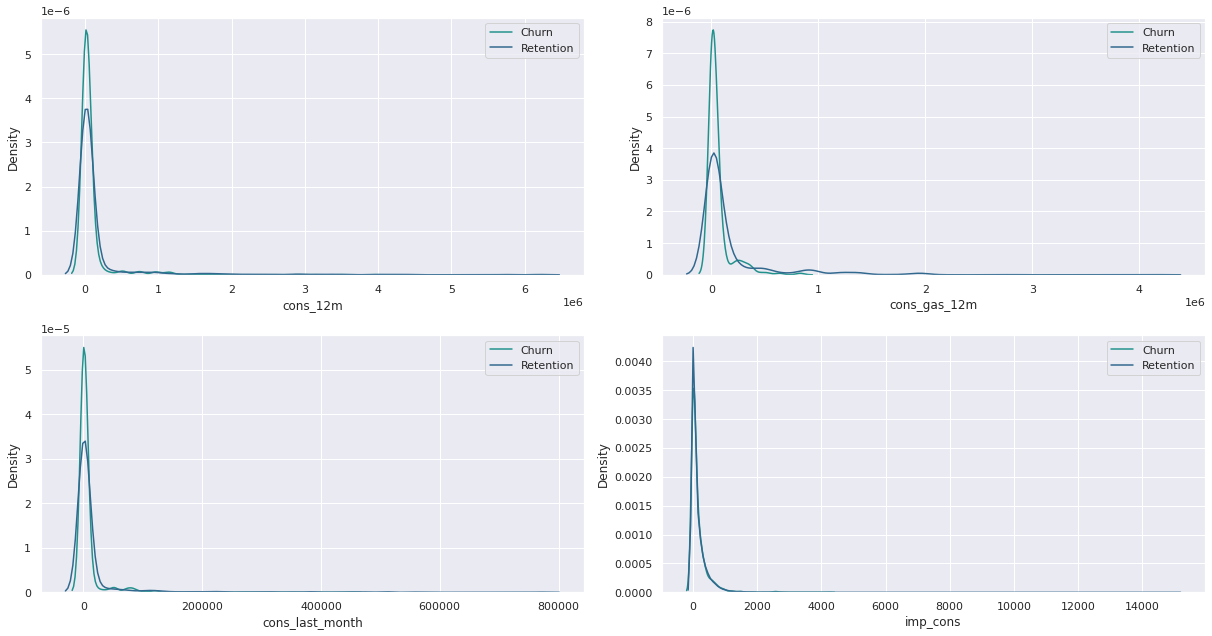

In [26]:
# Create Consumption Distribution Chart

cons = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']

plt.figure(figsize=(17,9))
for i in range(0, len(cons)):
  plt.subplot(2, 2, i+1)
  if cons[i] == 'cons_gas_12m':
    sns.kdeplot(x=client_df[(client_df['has_gas'] == 't') & (client_df['churn'] == 1)][cons[i]], palette='viridis', linewidth=1.5, color = '#21918c', label='Churn')
    sns.kdeplot(x=client_df[(client_df['has_gas'] == 't') & (client_df['churn'] == 0)][cons[i]],palette='viridis', linewidth=1.5, color = '#31688e', label='Retention')
    plt.xlabel(cons[i])
    plt.legend()
  else:
    sns.kdeplot(x=client_df[client_df['churn'] == 1][cons[i]], palette='viridis', linewidth=1.5, color = '#21918c', label='Churn')
    sns.kdeplot(x=client_df[client_df['churn'] == 0][cons[i]], palette='viridis', linewidth=1.5, color = '#31688e', label='Retention')
    plt.xlabel(cons[i])
    plt.legend()
  plt.tight_layout()

*Key Takeaway*

*   As predicted before, we can see clearly that the `consumption` features are highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. We will handle it later on `data preprocessing` stage.
*   Interestingly, we can see clearly that churn and retention of customers have similar trends related to `electricity and gas consumption`. So, it seems `electricity and gas consumptions` have a low correlation to `churn rate`.

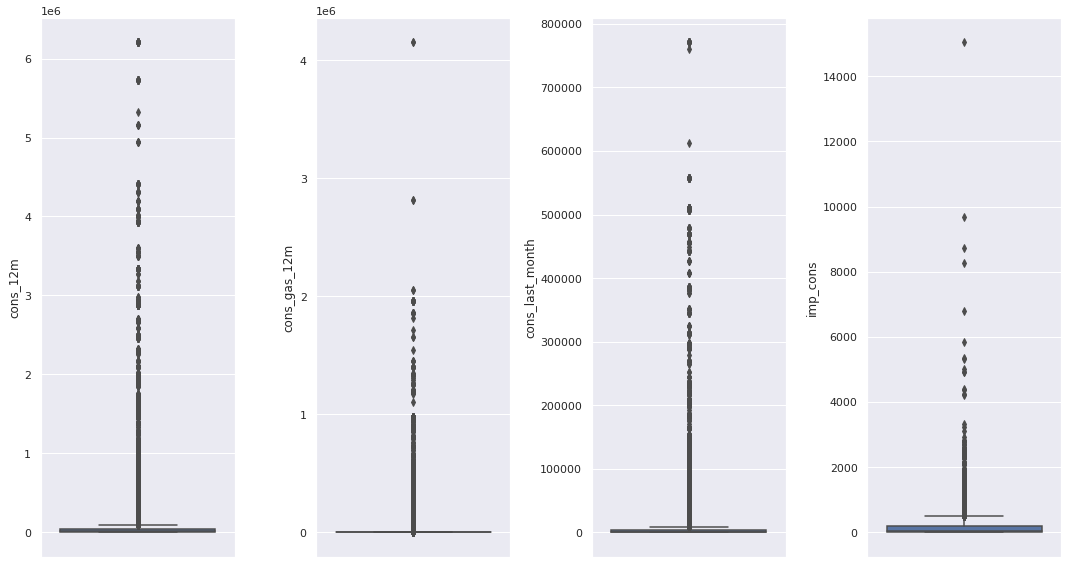

In [27]:
# Create Consumption Boxplot

fig, axes = plt.subplots(1, 4, figsize=(15,8))

for i in range(len(cons)):
  sns.boxplot(y=client_df[cons[i]], ax=axes[i])
  plt.tight_layout()

*Key Takeaway*

The values on the higher end of the distribution are likely to be extremely outliers. We will handle it later on `data preprocessing` stage.

##### Forecast Analysis

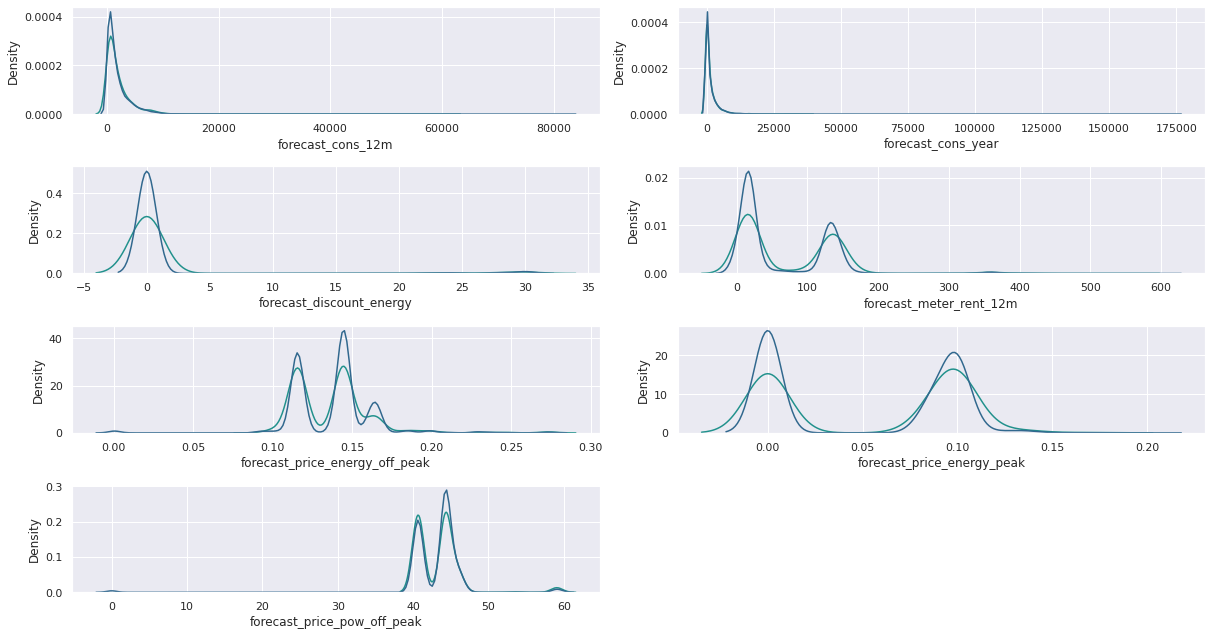

In [28]:
# Create Forecast Distribution Chart

forecast = [ 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
        'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
        'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

plt.figure(figsize=(17,9))
for i in range(0, len(forecast)):
  plt.subplot(4, 2, i+1)
  sns.kdeplot(x=client_df[client_df['churn'] == 1][forecast[i]], palette='viridis', linewidth=1.5, color = '#21918c', label='Churn')
  sns.kdeplot(x=client_df[client_df['churn'] == 0][forecast[i]], palette='viridis', linewidth=1.5, color = '#31688e', label='Retention')
  plt.xlabel(forecast[i])
  plt.tight_layout()

*Key Takeaway*

*   As predicted before, we can see clearly that the several `forecast` features are highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. We will handle it later on `data preprocessing` stage.
*   Interestingly, we can see clearly that churn and retention of customers have similar trends related to `electricity and gas consumption`. So, it seems `forecast price` have a low correlation to `churn rate`.

##### Margin Analysis

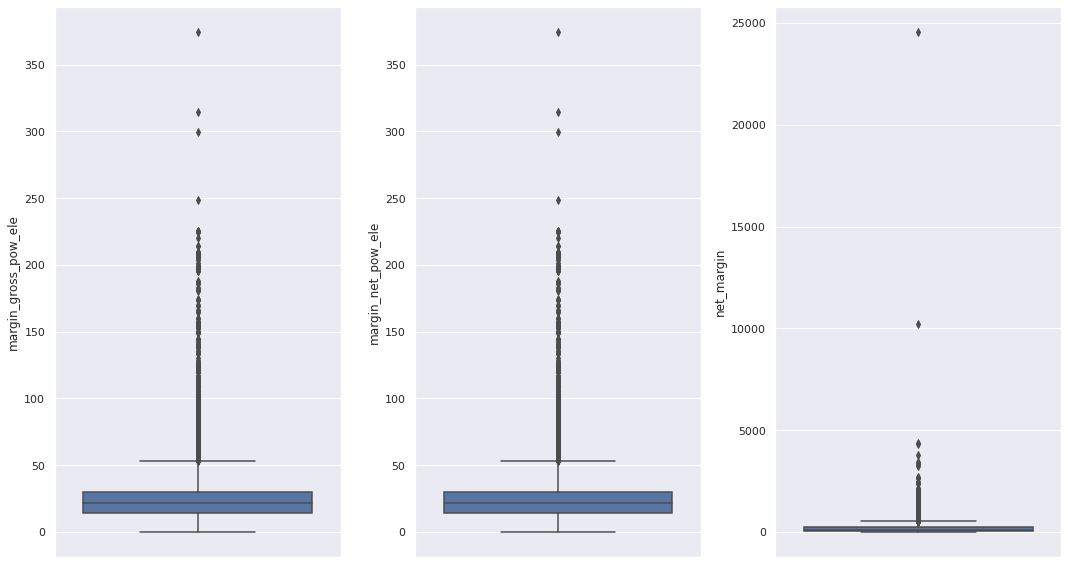

In [29]:
# Create Margin Boxplot

margin = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']

fig, axes = plt.subplots(1, 3, figsize=(15,8))

for i in range(len(margin)):
  sns.boxplot(y=client_df[margin[i]], ax=axes[i])
  plt.tight_layout()

*Key Takeaway*

Same as consumption features. The values on the higher end of the distribution are likely to be extremely outliers. We will handle it later on `data preprocessing` stage.

##### Subscribed Power Analysis

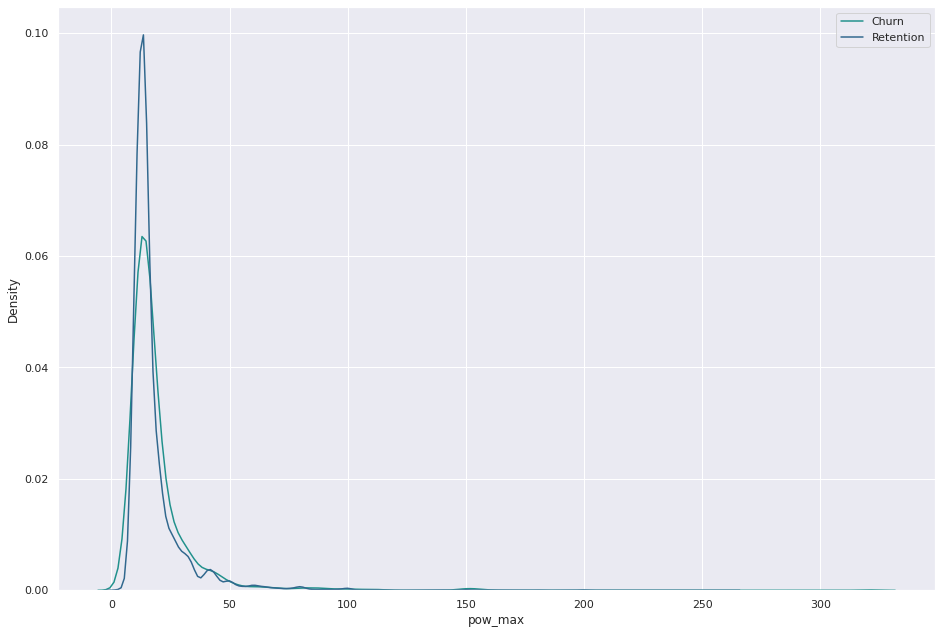

In [30]:
# Create Subscribed Power Distribution Chart

plt.figure(figsize=(14,10))
sns.kdeplot(x=client_df[client_df['churn'] == 1]['pow_max'], palette='viridis', linewidth=1.5, color = '#21918c', label='Churn')
sns.kdeplot(x=client_df[client_df['churn'] == 0]['pow_max'], palette='viridis', linewidth=1.5, color = '#31688e', label='Retention')
plt.xlabel('pow_max')
plt.legend()

*Key Takeaway*

We can see clearly that churn and retention of customers have similar trends related to `max subscribed power`. So, it seems `max power` have a low correlation to `churn rate`.

### Hypothesis Testing

Now that we have explored the data, it's time to investigate whether price sensitivity has some influence on churn. First we need to define exactly what is price sensitivity.

    > Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months

In [31]:
price_df.sample(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
182523,1ebd1a0fcc9bc458b4341ebac2b787e7,2015-10-01,0.23,0.12,0.00,45.94,0.00,0.00
33630,379948cd4fdb69b62338a7483af25e9c,2015-06-01,0.15,0.00,0.00,44.27,0.00,0.00
126990,ea033f0fda989bc63afcb650d054b673,2015-11-01,0.16,0.08,0.00,44.44,0.00,0.00
87220,ddba9e5c15c9d384dee874cfb7804daf,2015-04-01,0.15,0.00,0.00,44.27,0.00,0.00
128281,3e0141fdd377821cdd72da9d89210104,2015-06-01,0.15,0.09,0.00,44.27,0.00,0.00


In [32]:
# Convert Price Date Data Type

price_df.price_date = pd.to_datetime(price_df.price_date)

In [33]:
# Create Mean Price Data

mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [34]:
# Split Data by Time

mean_year = mean_year.rename( 
    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

mean_6m = mean_6m.rename(
    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)
mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

mean_3m = mean_3m.rename(
    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)
mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

# Merge Price Data
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [35]:
price_features.sample(5)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
11363,b564d9a1770b764cb35b3c98ea909aee,0.17,0.09,0.00,44.46,0.00,0.00,44.63,0.09,0.00,0.17,0.09,0.00,44.66,0.00,0.00,44.83,0.09,0.00,0.17,0.09,0.00,45.44,0.00,0.00,45.61,0.09,0.00
12193,c2ef3ccdaac71418c7582b7745aa63e1,0.15,0.00,0.00,44.27,0.00,0.00,44.42,0.00,0.00,0.15,0.00,0.00,44.27,0.00,0.00,44.41,0.00,0.00,0.15,0.00,0.00,44.27,0.00,0.00,44.41,0.00,0.00
13178,d1beab523d8281eaf38abf78a27d5e9c,0.17,0.00,0.00,44.27,0.00,0.00,44.44,0.00,0.00,0.17,0.00,0.00,44.27,0.00,0.00,44.43,0.00,0.00,0.17,0.00,0.00,44.27,0.00,0.00,44.43,0.00,0.00
14022,de907dbd75c73c227a160d5b67773b8a,0.15,0.00,0.00,44.27,0.00,0.00,44.42,0.00,0.00,0.15,0.00,0.00,44.27,0.00,0.00,44.42,0.00,0.00,0.15,0.00,0.00,44.27,0.00,0.00,44.41,0.00,0.00
6488,66498f8366d46629be8603f23c3b68a2,0.12,0.10,0.07,40.61,24.36,16.24,40.73,24.47,16.31,0.12,0.10,0.07,40.65,24.39,16.26,40.77,24.49,16.33,0.12,0.10,0.07,40.73,24.44,16.29,40.85,24.54,16.37


In [36]:
# Merge Customers Churn and Price Data

price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.sample(5)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
208,03c22e2df4c7e7db5004aea9bb2678f0,0.13,0.11,0.07,40.59,24.36,16.24,40.72,24.46,16.31,0.12,0.10,0.07,40.62,24.37,16.25,40.74,24.48,16.32,0.12,0.10,0.07,40.73,24.44,16.29,40.85,24.54,16.37,0
11222,c569134fe60a146b89d00e229a050542,0.12,0.10,0.07,40.73,24.44,16.29,40.85,24.54,16.37,0.12,0.10,0.07,40.73,24.44,16.29,40.85,24.54,16.37,0.12,0.10,0.08,40.73,24.44,16.29,40.85,24.54,16.37,0
1004,1106f3204d7562ed3b91319977a03852,0.15,0.00,0.00,44.39,0.00,0.00,44.54,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0
6527,7284d1e29b88b5484f5e70713e89acc0,0.15,0.01,0.00,44.36,0.00,0.00,44.50,0.01,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0
9510,a7853e3fb193069d388aab7493f0f545,0.15,0.00,0.00,44.27,0.00,0.00,44.42,0.00,0.00,0.15,0.00,0.00,44.27,0.00,0.00,44.42,0.00,0.00,0.15,0.00,0.00,44.27,0.00,0.00,44.41,0.00,0.00,0


In [37]:
# Check Price Features Data Statistic Value

price_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_year_price_off_peak_var,14605.00,0.14,0.02,0.00,0.12,0.15,0.15,0.28
mean_year_price_peak_var,14605.00,0.05,0.05,0.00,0.00,0.08,0.10,0.20
mean_year_price_mid_peak_var,14605.00,0.03,0.04,0.00,0.00,0.00,0.07,0.10
mean_year_price_off_peak_fix,14605.00,42.93,4.55,0.00,40.69,44.28,44.37,59.29
mean_year_price_peak_fix,14605.00,9.46,12.05,0.00,0.00,0.00,24.37,36.49
mean_year_price_mid_peak_fix,14605.00,6.10,7.77,0.00,0.00,0.00,16.25,16.82
mean_year_price_off_peak,14605.00,43.07,4.57,0.00,40.81,44.44,44.52,59.56
mean_year_price_peak,14605.00,9.51,12.09,0.00,0.00,0.08,24.48,36.59
mean_year_price_mid_peak,14605.00,6.13,7.81,0.00,0.00,0.00,16.32,16.91
mean_6m_price_off_peak_var,14605.00,0.14,0.02,0.00,0.12,0.15,0.15,0.28


In [38]:
import ppscore as pps

In [39]:
price_analysis.columns[1:-1]

Index(['mean_year_price_off_peak_var', 'mean_year_price_peak_var',
       'mean_year_price_mid_peak_var', 'mean_year_price_off_peak_fix',
       'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
       'mean_year_price_off_peak', 'mean_year_price_peak',
       'mean_year_price_mid_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix', 'mean_6m_price_peak_fix',
       'mean_6m_price_mid_peak_fix', 'mean_6m_price_off_peak',
       'mean_6m_price_peak', 'mean_6m_price_mid_peak',
       'mean_3m_price_off_peak_var', 'mean_3m_price_peak_var',
       'mean_3m_price_mid_peak_var', 'mean_3m_price_off_peak_fix',
       'mean_3m_price_peak_fix', 'mean_3m_price_mid_peak_fix',
       'mean_3m_price_off_peak', 'mean_3m_price_peak',
       'mean_3m_price_mid_peak'],
      dtype='object')

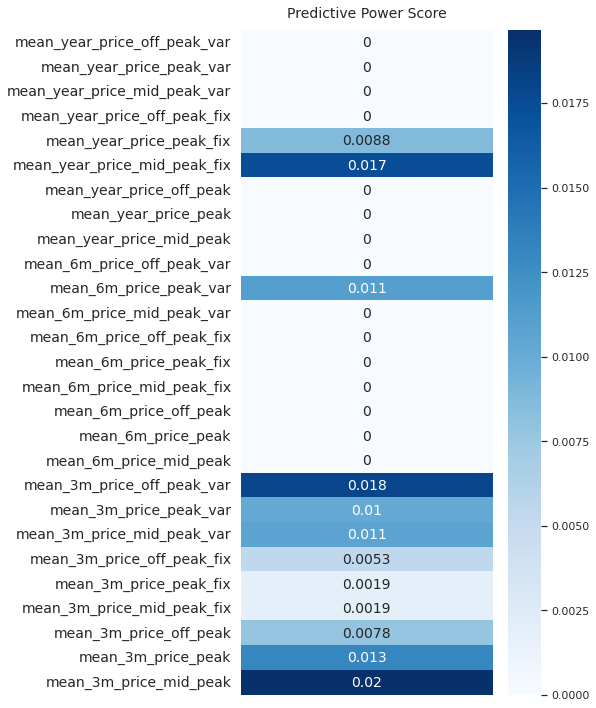

In [40]:
# Calculate How Good Price Features to Predict Churn

price_analysis['churn'] = price_analysis['churn'].astype('str')
ppscore = []
for feature in price_analysis.columns[1:-1]:
  ppscore.append([pps.score(price_analysis, feature, "churn")['ppscore']])
ppscore_df = pd.DataFrame(data=ppscore, columns=['Predictive Power Score'], index = price_analysis.columns[1:-1])
plt.figure(figsize=(8, 10))
sns.heatmap(ppscore_df, annot=True, cmap="Blues", annot_kws={"fontsize":14})
plt.tick_params(axis='both', which='major', labelsize=14, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.tight_layout()
plt.show()

*Key Takeaway*

From the predictive power score plot, it shows that overall the predictive score with churn is dominated by 0 or very low values. This indicates that there is a weak (almost no) relationship between price sensitivity and churn. This suggests that for price sensitivity to be a major driver for predicting churn, we may need to engineer the feature differently.

### Suggestions

Need these data to do further analysis :




*   Competitor Price Data <br>
Perhaps a client is more likely to churn if a competitor has a good offer available?
*   Average Utility Prices Across the Country <br>
If PowerCo’s prices are way above or below the country average, will a client be likely to churn?
*   Client Feedback <br>
A track record of any complaints, calls, or feedback provided by the client to PowerCo might reveal if a client is likely to churn

In [41]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')
merged_data.sample(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
14193,5d03a8a6e21458ec0599e765e15be244,foosdfpfkusacimwkcsosbicdxkicaua,9434,0,1712,2012-06-14,2016-06-14,2015-04-29,2015-06-21,1405.46,1712,0.00,16.83,0.14,0.00,44.31,f,250.70,22.52,22.52,1,137.53,4,lxidpiddsbxsbosboudacockeimpuepw,13.85,0.15,0.00,0.00,44.36,0.00,0.00,44.50,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0
13665,76424c7366ee27af6659755a80caf984,usilxuppasemubllopkaafesmlibmsdf,4875,0,989,2012-02-27,2016-02-27,2014-06-28,2015-03-09,735.06,989,0.00,18.27,0.15,0.00,44.31,f,146.29,30.00,30.00,1,77.92,4,lxidpiddsbxsbosboudacockeimpuepw,12.00,0.15,0.00,0.00,44.44,0.00,0.00,44.60,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0
10323,8278424369d40a8cb1b8995ec60b67cc,foosdfpfkusacimwkcsosbicdxkicaua,22197,0,2858,2011-01-01,2017-01-01,2015-11-16,2016-01-02,3221.10,2858,0.00,0.00,0.14,0.00,44.31,f,412.37,25.92,25.92,1,314.85,5,lxidpiddsbxsbosboudacockeimpuepw,11.50,0.15,0.01,0.00,44.27,0.00,0.00,44.41,0.01,0.00,0.14,0.01,0.00,44.27,0.00,0.00,44.41,0.01,0.00,0.15,0.04,0.00,44.27,0.00,0.00,44.41,0.04,0.00,0
467,89d91200942ec946a1cffab428a0704d,MISSING,8331,0,2315,2010-07-14,2016-03-18,2015-03-18,2014-12-18,1694.30,2315,30.00,16.09,0.20,0.00,45.81,f,465.03,33.19,33.19,2,100.41,6,ldkssxwpmemidmecebumciepifcamkci,10.39,0.20,0.00,0.00,45.71,0.00,0.00,45.91,0.00,0.00,0.20,0.00,0.00,45.91,0.00,0.00,46.12,0.00,0.00,0.20,0.00,0.00,45.94,0.00,0.00,46.15,0.00,0.00,0
134,408e0c75cd8f58197c06edb73428bb0d,foosdfpfkusacimwkcsosbicdxkicaua,3118110,468369,289924,2012-02-01,2016-02-01,2012-02-01,2015-02-09,3269.76,3690,0.00,39.77,0.12,0.10,40.61,t,353.43,24.00,24.00,2,387.56,4,lxidpiddsbxsbosboudacockeimpuepw,16.00,0.13,0.10,0.06,41.49,18.25,12.17,41.62,18.36,12.23,0.13,0.10,0.05,41.80,16.23,10.82,41.93,16.32,10.87,0.12,0.10,0.08,40.57,24.34,16.23,40.69,24.44,16.30,0


In [42]:
merged_data.to_csv('/content/drive/MyDrive/BCG - Data Science & Analytics Virtual Experience Program/Modul 2 - Exploratory Data Analysis/clean_data_after_eda.csv')